<a href="https://colab.research.google.com/github/Luseat/Prediksi-IHSG/blob/main/forecasting_IHSG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error
import yfinance as yf
import seaborn as sns
import matplotlib.dates as mdates

**Import Data IHSG**

In [2]:
start_date = "2017-01-01"
end_date = "2025-03-29"

data = yf.Ticker("^JKSE")
data = data.history(start=start_date, end=end_date)
del data['Dividends']
del data['Stock Splits']
forcaseData = data.copy()
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-03-21 00:00:00+07:00,6418.390137,6426.165039,6218.601074,6258.179199,190225100
2025-03-24 00:00:00+07:00,6242.234863,6269.903809,5967.193848,6161.217773,124187900
2025-03-25 00:00:00+07:00,6197.986816,6265.295898,6178.490234,6235.619141,111267000
2025-03-26 00:00:00+07:00,6314.329102,6489.148926,6312.966797,6472.355957,159762700
2025-03-27 00:00:00+07:00,6462.596191,6510.620117,6417.240234,6510.620117,121855500


**Penutupan harga indeks IHSG**

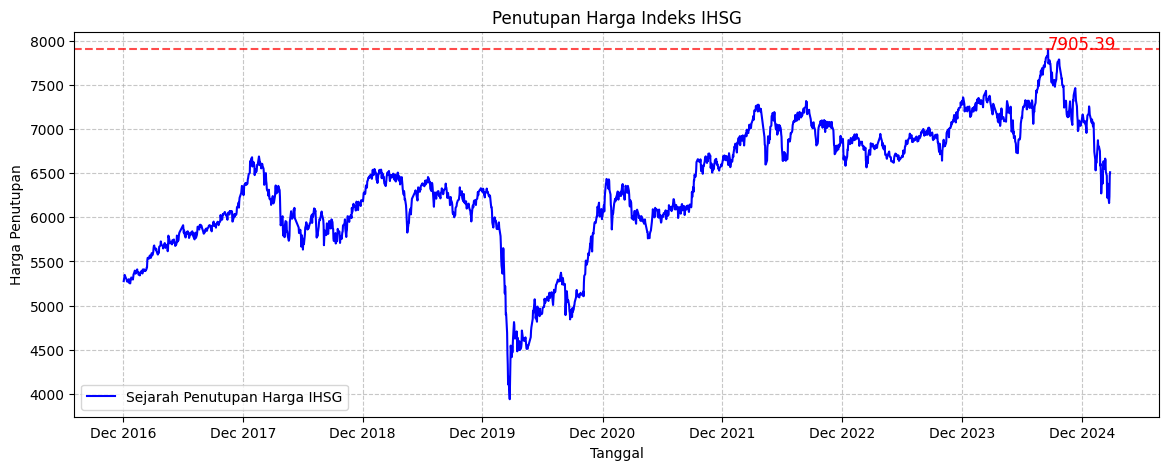

In [3]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.index, y='Close', label='Sejarah Penutupan Harga IHSG', color='blue')

max_price = data['Close'].max()
max_price_date = data['Close'].idxmax()

#Annotate the Highest price
plt.annotate(f'{max_price:.2f}',
             xy=(max_price_date, max_price),
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='red')

plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)
plt.title('Penutupan Harga Indeks IHSG')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Preprocessing**

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))
scaled_data

array([[0.33730361],
       [0.34365781],
       [0.34978741],
       ...,
       [0.57916512],
       [0.63883025],
       [0.64847402]])

In [5]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

In [6]:
sequence_length = 60 # dalam 2 bulan kedepan

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

**Training Data (LSTM)**

In [7]:
model = Sequential()

#layer pertama LSTM
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#layer kedua LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

#Dense layer
model.add(Dense(units=25))
model.add(Dense(units=1))




In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=200, batch_size=84, validation_data=(X_test, y_test))

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.1096 - val_loss: 0.0287
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0086 - val_loss: 0.0114
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 0.0048 - val_loss: 0.0023
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0039 - val_loss: 0.0021
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 10/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0032 - val_loss: 0.0020
Epoch 11/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 12/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/

**Evaluasi**

In [10]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_scaled, predictions) #y_test_scaled
print(f"Mean Squared Error (MSE): {mse}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Mean Squared Error (MSE): 4999.959928186242


**Prediksi dalam 2 bulan kedepan**

In [11]:
last_60_days = data['Close'][-sequence_length:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)

X_predict = []
X_predict.append(last_60_days_scaled)

X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))
predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)


print(f"Prediksi Harga : {predicted_price[0][0]}")

# next_day_prediction = model.predict(np.array([last_60_days_scaled]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediksi Harga : 6505.509765625


In [12]:
future_days = 60

last_60_days = data['Close'][-sequence_length:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)
future_predictions = []

for i in range(future_days):
    X_predict = []
    X_predict.append(last_60_days_scaled)
    X_predict = np.array(X_predict)
    X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

    predicted_price = model.predict(X_predict)
    predicted_price_unscaled = scaler.inverse_transform(predicted_price)

    future_predictions.append(predicted_price_unscaled[0, 0])

    new_scaled_data = np.append(last_60_days_scaled[1:], predicted_price, axis=0)
    last_60_days_scaled = new_scaled_data.reshape(-1, 1)

future_dates = pd.date_range(start=data.index[-1], periods=future_days+1, freq='D')[1:] # 0 O o

future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': future_predictions
    })

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

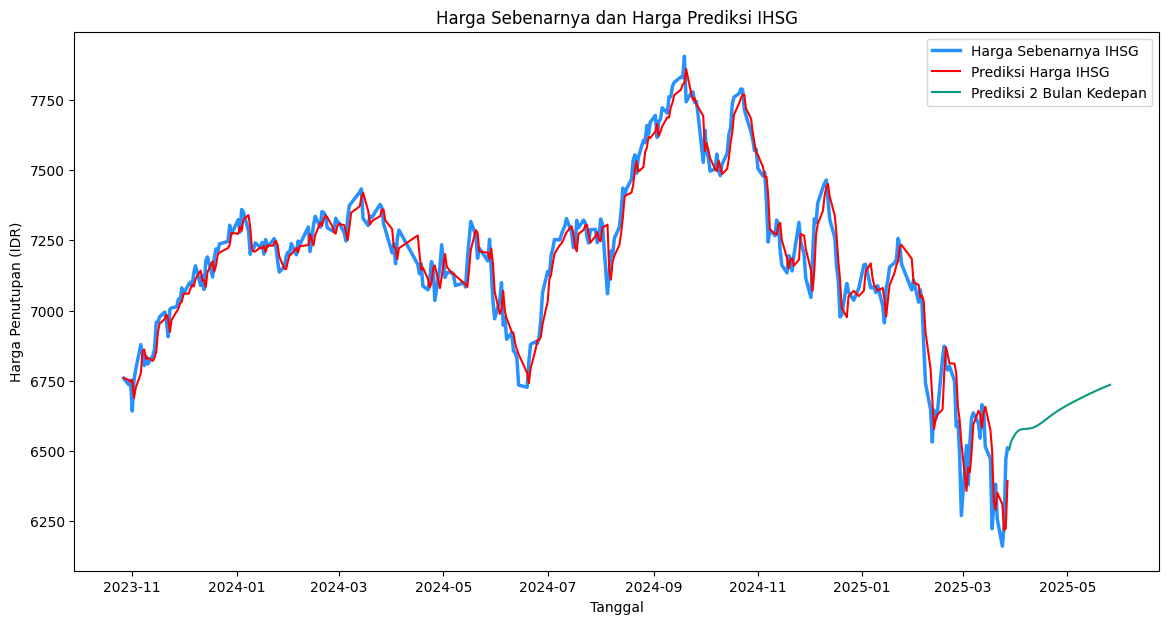

In [13]:
plt.figure(figsize=(14, 7))

plt.plot(data.index[-len(y_test_scaled):], y_test_scaled, label='Harga Sebenarnya IHSG', color='#2692ff', linewidth=2.5)
plt.plot(data.index[-len(y_test_scaled):], predictions, label='Prediksi Harga IHSG', color='red', linewidth=1.5)
plt.plot(future_dates, future_predictions, label='Prediksi 2 Bulan Kedepan', color='#089981', linewidth=1.5)

plt.title('Harga Sebenarnya dan Harga Prediksi IHSG')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (IDR)')
plt.legend()

plt.show()

In [15]:
future_predictions_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Prediksi Harga': future_predictions
})

future_predictions_df.tail()

,Tanggal,Prediksi Harga
55,2025-05-22 00:00:00+07:00,6725.762695
56,2025-05-23 00:00:00+07:00,6728.355469
57,2025-05-24 00:00:00+07:00,6730.913086
58,2025-05-25 00:00:00+07:00,6733.437012
59,2025-05-26 00:00:00+07:00,6735.926758


In [18]:
# Pergantian Presentase Harga dari Akhir Harga Penutupan Sebenarnya

last_actual_price = data['Close'].iloc[-1]
precentage_change = ((future_predictions_df['Prediksi Harga'].iloc[-1] - last_actual_price) / last_actual_price) * 100

# Menentukan Untung atau Rugi
status = "profit" if precentage_change > 0 else "Rugi"

# Menampilkan Prediksi Pergantian
print(f"Prediksi Pergantian Harga IHSG Dalam 60 Hari Kedepan : {status}  {abs(precentage_change):.2f}%")

Prediksi Pergantian Harga IHSG Dalam 60 Hari Kedepan : profit  3.46%
